# Estación Plaza Castilla

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_50.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

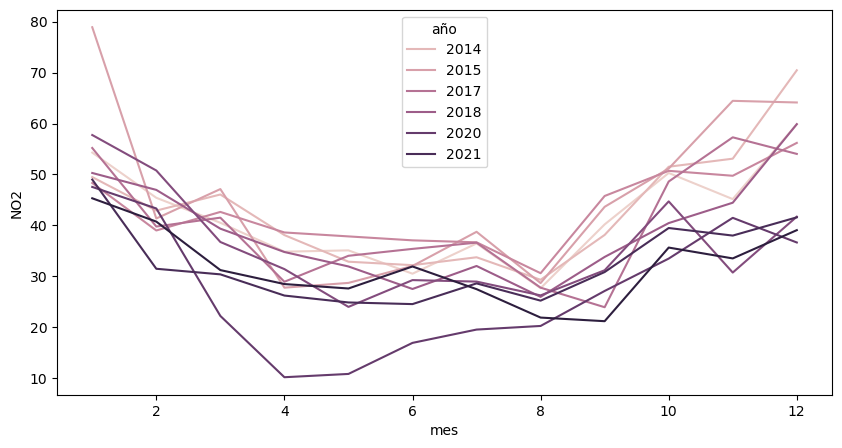

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

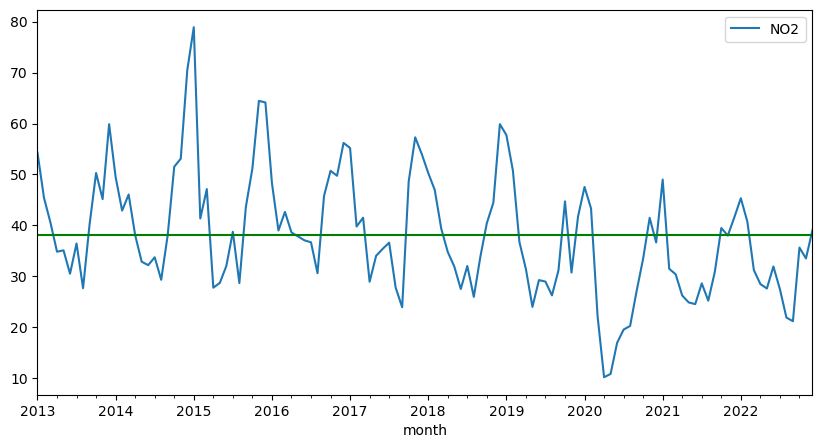

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

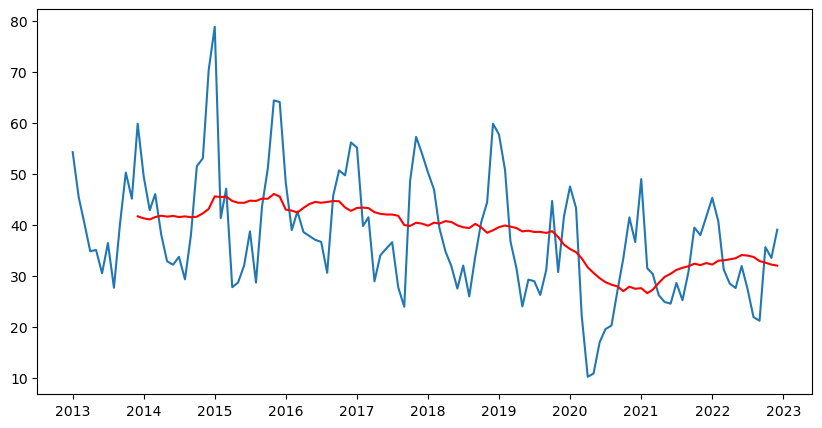

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,54.290323,2013,1
2013-02-01,45.419355,2013,2
2013-03-01,40.516129,2013,3
2013-04-01,34.838710,2013,4
2013-05-01,35.096774,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,54.290323,2013,1
2013-02-01,45.419355,2013,2
2013-03-01,40.516129,2013,3
2013-04-01,34.838710,2013,4
2013-05-01,35.096774,2013,5


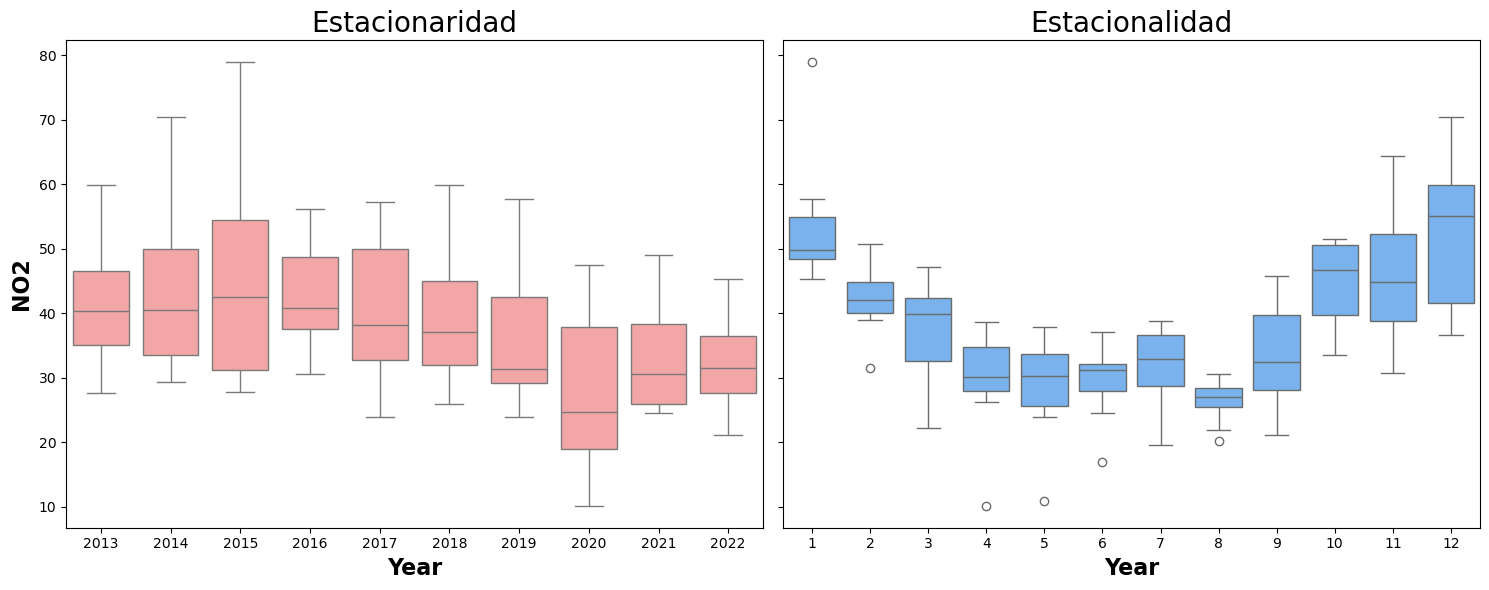

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.6273102009412581,
 0.8646908702549563,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 720.5148247008805)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.6273102009412581
p-value 0.8646908702549563
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.7142613466745417
2 mes Lag, 0.4450757944598813
3 mes Lag, 0.15799314294087363
4 mes Lag, -0.0963164677334831
5 mes Lag, -0.25581801380206326
6 mes Lag, -0.2821766120390352
7 mes Lag, -0.2848240837819675
8 mes Lag, -0.10343852202678223
9 mes Lag, 0.17132560543168768
10 mes Lag, 0.4280991170754049
11 mes Lag, 0.6372875448692671
12 mes Lag, 0.7536864746551721
13 mes Lag, 0.6275803695552432
14 mes Lag, 0.3771448850824921
15 mes Lag, 0.12210915465181717
16 mes Lag, -0.17519004719422163
17 mes Lag, -0.31742990047666264
18 mes Lag, -0.3172650918291807
19 mes Lag, -0.28449118164695497
20 mes Lag, -0.12953471168736913
21 mes Lag, 0.09970188171899003
22 mes Lag, 0.313082906696923
23 mes Lag, 0.5737341116957082
24 mes Lag, 0.7134664869907784
25 mes Lag, 0.5644053386177077
26 mes Lag, 0.35396862212813585
27 mes Lag, 0.09209975090878789
28 mes Lag, -0.15399934354873782
29 mes Lag, -0.3300063552211758
30 mes Lag, -0.3752574632396714
31 mes Lag, -0.3382827935155881
32 mes 

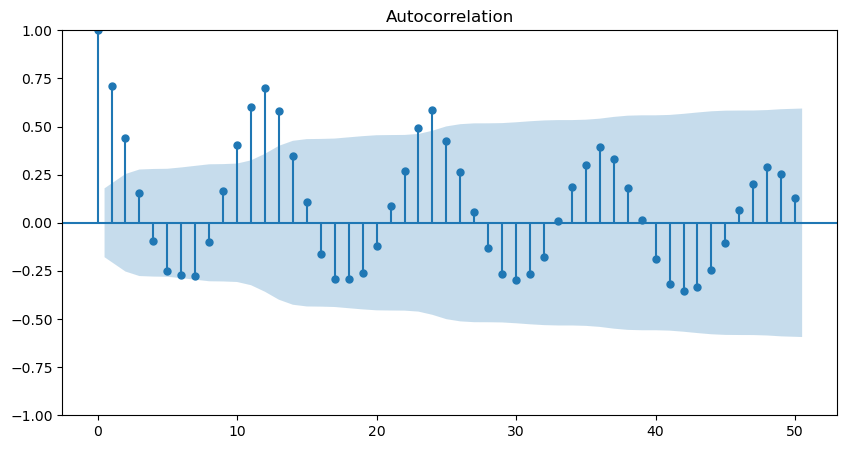

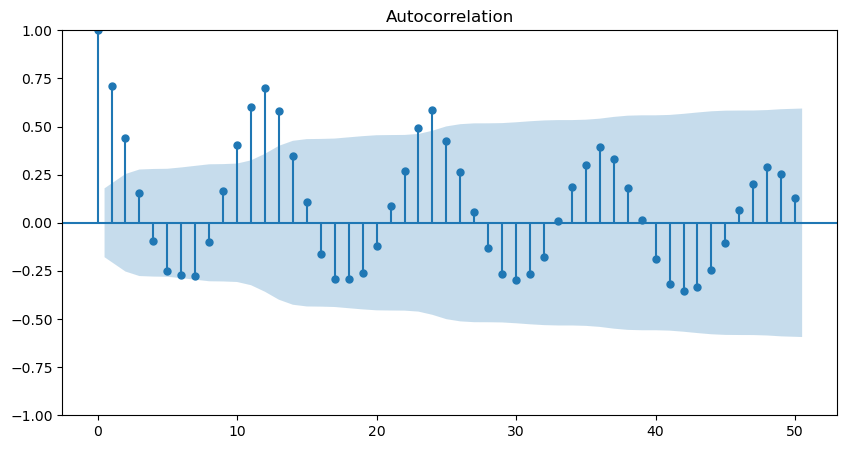

In [19]:
plot_acf(df, lags = 50)

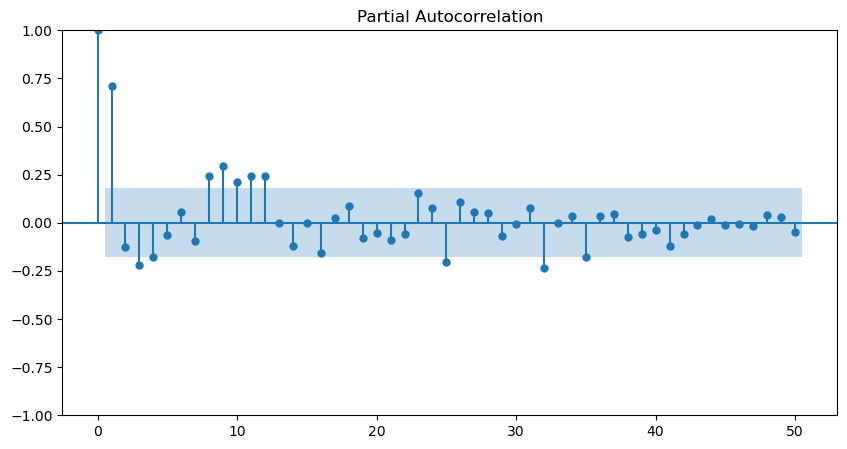

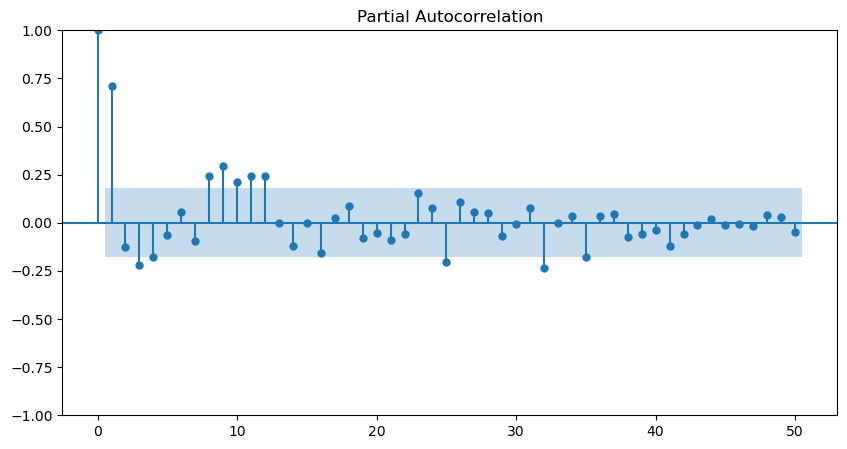

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|██████▎   | 15/24 [00:00<00:00, 25.27it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 609 ms
Wall time: 1.11 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
19,8.368333,"(3, 1, 1)"
20,10.489822,"(3, 1, 2)"
14,12.978129,"(2, 1, 2)"
15,15.445068,"(2, 2, 0)"
18,16.430753,"(3, 1, 0)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(3, 1, 2),  # modelo arima
               seasonal_order=(3, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  5.613642815568994
CPU times: total: 2.2 s
Wall time: 3.87 s


,real,pred,error
2020-07-01,19.548387,26.291215,6.742828
2020-08-01,20.258065,22.842619,2.584554
2020-09-01,27.129032,30.180106,3.051074
2020-10-01,33.483871,43.623669,10.139798
2020-11-01,41.483871,43.343804,1.859933
2020-12-01,36.645161,52.748781,16.103620
2021-01-01,49.000000,49.121332,0.121332
2021-02-01,31.483871,46.365810,14.881939
2021-03-01,30.387097,33.460623,3.073526
2021-04-01,26.225806,27.415813,1.190007


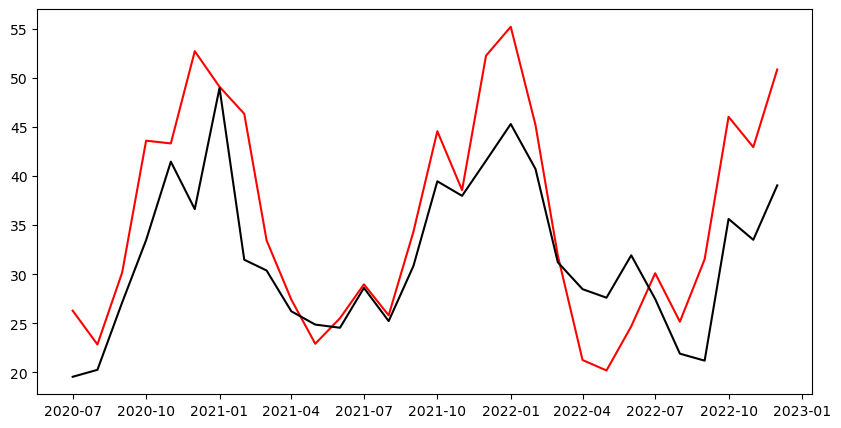

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,47.793843
2023-02-01,44.449122
2023-03-01,32.694718
2023-04-01,25.349259
2023-05-01,22.759105
2023-06-01,24.506487
2023-07-01,29.647434
2023-08-01,25.707010
2023-09-01,35.149217
2023-10-01,45.145413


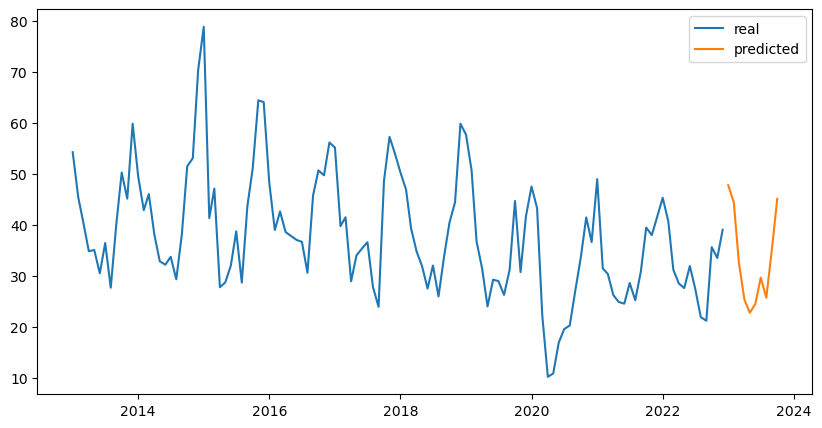

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,47.793843
2023-02-01,44.449122
2023-03-01,32.694718
2023-04-01,25.349259
2023-05-01,22.759105
2023-06-01,24.506487
2023-07-01,29.647434
2023-08-01,25.707010
2023-09-01,35.149217
2023-10-01,45.145413


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 50]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
158,158,50,2023,1,36.096774
159,159,50,2023,2,33.000000
160,160,50,2023,3,34.612903
161,161,50,2023,4,23.935484
162,162,50,2023,5,17.806452
163,163,50,2023,6,23.000000
164,164,50,2023,7,24.483871
165,165,50,2023,8,20.064516
166,166,50,2023,9,30.064516
167,167,50,2023,10,34.161290


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,158,36.096774
2023-02-01,159,33.000000
2023-03-01,160,34.612903
2023-04-01,161,23.935484
2023-05-01,162,17.806452
2023-06-01,163,23.000000
2023-07-01,164,24.483871
2023-08-01,165,20.064516
2023-09-01,166,30.064516


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

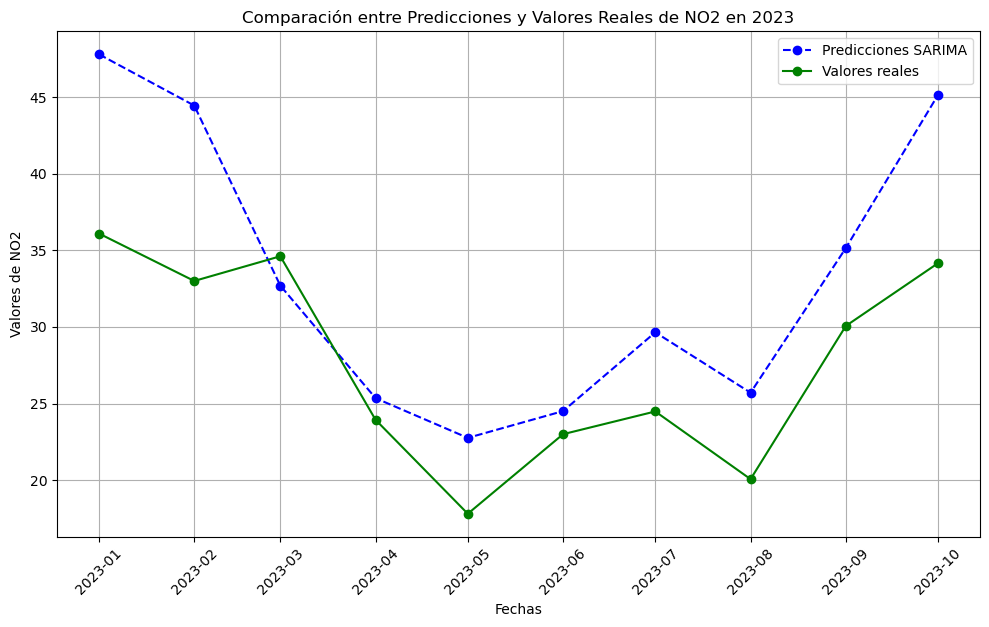

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    36.096774
2023-02-01    33.000000
2023-03-01    34.612903
2023-04-01    23.935484
2023-05-01    17.806452
2023-06-01    23.000000
2023-07-01    24.483871
2023-08-01    20.064516
2023-09-01    30.064516
2023-10-01    34.161290
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [46]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,47.793843
2023-02-01,44.449122
2023-03-01,32.694718
2023-04-01,25.349259
2023-05-01,22.759105
2023-06-01,24.506487
2023-07-01,29.647434
2023-08-01,25.707010
2023-09-01,35.149217
2023-10-01,45.145413


In [47]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    31.37892
dtype: float64

In [48]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Plaza Castilla"})
dff

,Plaza Castilla
NO2,31.37892


In [49]:
dff.to_csv('../../clean_visuals/predicts23/50_Plaza_Castilla.csv', index=True)